## Plot correlation profile plot:

In [1]:

import cartopy.crs as ccrs
import matplotlib.ticker as mtick

from useful_scit.util.zarray import corr_weight

from matplotlib import gridspec

In [2]:
import matplotlib.colors as colors
# load and autoreload
from IPython import get_ipython
from useful_scit.imps import (np, plt)

from sect_sens.constants import get_plotpath
from sect_sens.data_info import get_nice_name_case, get_nice_name_area
from sect_sens.data_info.simulation_types import get_casen_by_type_mod
from sect_sens.util.imports.get_fld_fixed import get_field_fixed
from sect_sens.util.naming_conventions.var_info import get_fancy_var_name, get_fancy_unit_xr
from sect_sens.util.plot import plot_maps
from sect_sens.util.practical_functions import make_folders
# noinspection PyBroadException
from sect_sens.util.slice_average.avg_pkg import get_mask_ds, average_model_var

try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Div settings:

In [3]:
from useful_scit.plot.fig_manip import subp_insert_abc




startyear = '0004-01'
endyear = '0008-12'
pressure_adjust = True  # Can only be false if

### Cases

In [4]:
cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl'
]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc'
]
cases = cases_orig + cases_sec

## Filenames

In [5]:
version = 'corrs'
plot_path = get_plotpath('profiles')
filen_base = plot_path + '/_%s' % version
make_folders(plot_path)

In [6]:
var_subl = ['FREQL', 'SOA_A1', 'NCONC01', 'AWNC_incld', 'AREL_incld', 'NMR01', 'HYGRO01', 'N_AER', 'N50', 'N100',
            'N150', 'N200', 'N250']
cases_dic = {}
for case in cases:
    dummy = get_field_fixed(case,
                            var_subl,
                            startyear, endyear,
                            pressure_adjust=pressure_adjust)
    cases_dic[case] = dummy.sel(lev=slice(150, None), ).copy()  # .isel(time=slice(0,36
    del dummy

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


In [7]:
def corr_plt(var_c=None,
             varl_to=None,
             case_type=None,
             model_types=None,
             area='Global',
             relative=True,
             xlim=None,
             figsize=None,
             include_title=False,
             include_abc=True,
             axs=None,
             fig=None,
             di_corrs=None,
             diff_di=None,
             FREQL_mean=None,
             add_legend=True
             ):
    if figsize is None:
        figsize = [5., 3.7]
    if var_c is None:
        var_c = 'AWNC_incld'
    if varl_to is None:
        varl_to = ['N50', 'N100', 'N150', 'N200', 'N250']
    if case_type is None:
        case_type = 'PI'
    if model_types is None:
        model_types = ['OsloAeroSec', 'OsloAero$_{def}$', ]

    # Create figure:
    if axs is None:
        fig = plt.figure(constrained_layout=True, figsize=figsize)
        widths = [2, 1]
        spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, )
        # height_ratios=[0.1,10])
        # create axes:
        axs = [fig.add_subplot(spec5[col]) for col in range(2)]

    # Get names of cases from type and model:
    case_oth = get_casen_by_type_mod(case_type, model_types[0])
    case_ctrl = get_casen_by_type_mod(case_type, model_types[1])
    # get nice names or pretty names for plotting
    nn_oth = get_nice_name_case(model_types[0])
    nn_ctrl = get_nice_name_case(model_types[1])

    dim = ['lat', 'lon', 'time']
    minp = 850
    time_mask = None
    # Get and check mask:
    if di_corrs is None or diff_di is None:
        # Get the correlation in relevant area
        di_corrs, diff_di, mask = get_area_corr_diff2(area, case_type, dim, minp,
                                                      model_types,
                                                      relative,
                                                      time_mask,
                                                      var_c,
                                                      varl_to)
    cols = plt.cm.cividis(np.linspace(0, 1, len(varl_to)))

    # plot FREQL:
    if FREQL_mean is None:
        # Get mean of FREQL to plot water content:
        mask = check_mask(area, dim, minp, time_mask, var_c, cases_dic[case_oth])
        _ds = average_model_var(cases_dic[case_oth].where(~mask), 'FREQL', dim=dim)
    else:
        _ds = FREQL_mean

    # Add extry x axis for plotting liquid water content:
    ax_t = axs[0].twiny()
    ax_t.fill_betweenx(_ds['lev'], -_ds['FREQL'] / 2, _ds['FREQL'] / 2, alpha=.2)
    ax_t.tick_params(top=False, bottom=False, left=False, right=False, labeltop=False, labelbottom=False)
    ax_t.spines['right'].set_visible(False)
    ax_t.spines['top'].set_visible(False)
    m = np.max(np.abs(ax_t.get_xlim()))
    ax_t.set_xlim([-m, m])

    # Plot correlations:
    ax = axs[0]
    for j, var in enumerate(varl_to):
        _da_corr = di_corrs[var]
        label = fr'$\Delta${get_fancy_var_name(var)}'  # )
        _da_corr.plot(y='lev', c=cols[j], ax=ax, label=label)
    # Plot difference
    for j, var in enumerate(varl_to):
        _da_diff = diff_di[var][var]
        label = fr'$\Delta${get_fancy_var_name(var)}'  # )
        w = _da_diff.lev >= _da_diff.sel(lev=200, method='nearest').lev
        _da_diff.where(w).plot(y='lev', c=cols[j], ax=axs[1], label=label)
    # title:
    area_nn = get_nice_name_area(area)
    title = fr'{area_nn}, {case_type}: $\Delta V = V_x - V_y$, \n x={nn_oth}, y={nn_ctrl}'
    if not include_title:
        title = ''
    stit = plt.suptitle(title, y=1.1)

    # Tweak axis:
    tweak_axis_apperance(_ds, add_legend, axs, include_abc, relative, var_c, varl_to, xlim)

    fn = filen_base + f'_N_{var_c}_{case_oth}_{case_ctrl}_{area}_{startyear}-{endyear}_{str(relative)}'
    print(fn)
    # plt.savefig(fn + '.pdf', bbox_extra_artists=(stit,),bbox_inches='tight')
    return fig, axs, fn, stit

def tweak_axis_apperance(_ds,
                         add_legend, axs,
                         include_abc, relative, var_c,
                         varl_to, xlim):
    """
    Various fixes to axis appearance
    :param _ds:
    :param add_legend:
    :param axs:
    :param include_abc:
    :param relative:
    :param var_c:
    :param varl_to:
    :param xlim:
    :return:
    """
    for ax in axs:
        ax.set_yscale('log')
        ax.set_ylim([1e3, 200])
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
        ax.yaxis.set_minor_formatter(mtick.FormatStrFormatter('%.0f'))
        ax.vlines(0, 200, 1e3, linewidth=1)
        ax.set_ylabel('')
        ax.set_xlabel('')
    # first plot:
    ax = axs[0]
    ax.set_xlabel(fr'corr($\Delta {get_fancy_var_name(var_c)},\Delta X$)')
    ax.set_ylabel('Pressure [hPa]')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if xlim is None:
        m = np.max(np.abs(ax.get_xlim()))
        xlim = [-m, m]
    ax.set_xlim(xlim)
    # second plot:
    ax = axs[1]
    v = varl_to[0]
    if relative:
        unit = '[%]'
    else:
        unit = f'{get_fancy_unit_xr(_ds[v], v)}'
    ax.set_xlabel(fr'$\Delta X$ [{unit}]')
    ax.yaxis.set_major_formatter(mtick.NullFormatter())
    ax.yaxis.set_minor_formatter(mtick.NullFormatter())
    ax: plt.axes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if add_legend:
        ax.legend(frameon=True, loc='upper left')  # , borderaxespad=0.)
    # subp_insert_abc(np.array(axs), pos_x=1.13,pos_y=1.01)
    if include_abc:
        subp_insert_abc(np.array(axs), pos_x=-0.2, pos_y=-.05)

def get_area_corr_diff2(area, case_type, dim, minp, model_types, relative,
                        time_mask, var_c, varl_to):
    """
    Get correlation within area of change in for variable (var_c) to variables (varl_to)
    from case type and model type
    :param area:
    :param case_type:
    :param dim:
    :param minp:
    :param model_types:
    :param relative:
    :param time_mask:
    :param var_c:
    :param varl_to:
    :return:
    """
    case_oth = get_casen_by_type_mod(case_type, model_types[0])
    case_ctrl = get_casen_by_type_mod(case_type, model_types[1])
    di_corrs, diff_di, mask = get_area_corr_diff(area, case_ctrl, case_oth, dim, minp, relative, time_mask, var_c,
                                                 varl_to)
    return di_corrs, diff_di, mask  # case_ctrl, case_oth, di_corrs, diff_di, mask, nn_ctrl, nn_oth

def get_area_corr_diff(area, case_ctrl,
                       case_oth, dim, minp,
                       relative, time_mask,
                       var_c, varl_to, mask=None):
    """
        Get correlation within area of change in for variable (var_c) to variables (varl_to)
    from case_ctrl and case_oth
    :param area:
    :param case_ctrl:
    :param case_oth:
    :param dim:
    :param minp:
    :param relative:
    :param time_mask:
    :param var_c:
    :param varl_to:
    :param mask:
    :return:
    """
    xr_ds = cases_dic[case_ctrl]  # [var_c]
    if mask is None:
        mask = check_mask(area, dim, minp, time_mask, var_c, xr_ds)
    # Compute correlations and differences
    diff_di = {}
    di_corrs = {}
    for j, var in enumerate(varl_to):
        _vars = [var, var_c]
        _ds = (cases_dic[case_oth][_vars] - cases_dic[case_ctrl][_vars])  # /cases_dic[case_ctrl][_vars]
        # mask difference
        _ds = _ds.where(~mask)
        # average masked:
        if relative:
            _ds_ctrl = cases_dic[case_ctrl].where(~mask)
            _ds_ctrl = average_model_var(_ds_ctrl, var, dim=dim)
            _ds_diff = average_model_var(_ds, var, dim=dim)
            diff_di[var] = _ds_diff / (_ds_ctrl + 1e-30) * 100
        else:
            diff_di[var] = average_model_var(_ds, var, dim=dim)
        # correlation:
        # _da_corr = corr(_ds[var], _ds[var_c], dim=['time', 'lon', 'lat'])
        _da_corr = corr_weight(_ds[var], _ds[var_c], xr_ds['lat_wg'], dim=['time', 'lon', 'lat'])

        di_corrs[var] = _da_corr.copy()
    return di_corrs, diff_di, mask

def check_mask(area, dim, minp, time_mask, var_c, xr_ds, plt_map=False):
    mask = get_mask_ds(area, dim, minp, time_mask, var_c, xr_ds)
    if plt_map:
        fig, ax = plot_maps.subplots_map(1)
        xr_ds.where(~mask).isel(lev=1, time=0)['N50'].plot(transform=ccrs.PlateCarree(), ax=ax)
        plot_maps.fix_axis4map_plot(ax)
        plt.show()
    return mask

In [8]:

def plot_several_areas(varl_to=None,
                       var_c=None,
                       relative=False,
                       case_types=None,
                       areas=None,
                       model_types=None,
                       include_abc=True):

    # Set default values:
    if areas is None:
        areas = ['Global', 'Antarctic', 'Pacific S', 'Pacific N']
    if var_c is None:
        var_c = 'AWNC_incld'
    if varl_to is None:
        varl_to = ['N50', 'N100', 'N150', 'N200', 'N250']
    if model_types is None:
        model_types = ['OsloAeroSec', 'OsloAero$_{def}$', ]
    if case_types is None:
        case_types = ['PI', 'PD']

    # Create figure:
    fig, spec5 = create_figure_big_plot(areas, case_types)

    axs_num = []
    for j, area in enumerate(areas):
        print(j, area)

        for i, case_type in enumerate(case_types):
            print(i)

            axs = [fig.add_subplot(spec5[2 + j * 2, 3 * i + col]) for col in range(2)]
            axs_num.append(axs[0])
            fig, axs, fn, stit = corr_plt(var_c=None,
                                          varl_to=None,
                                          case_type=case_type,
                                          model_types=model_types,
                                          area=area,
                                          relative=False,
                                          xlim=[-.50, .50],
                                          axs=axs,
                                          fig=fig,
                                          include_abc=False,
                                          add_legend=False
                                          )
            fix_subplot_corr(area, areas, axs, fig, i, j, spec5)
    ax = fig.add_subplot(spec5[-1, :])
    ax.axis('off')
    from matplotlib.lines import Line2D

    cols = plt.cm.cividis(np.linspace(0, 1, len(varl_to)))
    custom_lines = []
    labs = []
    for i, var in enumerate(varl_to):
        label = fr'$\Delta${get_fancy_var_name(var)}'  # )
        labs.append(label)
        custom_lines.append(Line2D([0], [0], color=cols[i], label=label))

    legend = ax.legend(custom_lines, labs, ncol=len(varl_to),
                       loc='lower center', bbox_to_anchor=(0., 0., 1, .01),
                       frameon=False
                       )
    # frame = legend.get_frame()
    # frame.set_color('white')

    # plt.subplots_adjust(wspace=None, hspace=None)
    # spec5.update(wspace=0.025, hspace=0.05) # set the spacing between axes.
    fn = create_fn_figplot(areas, case_types, model_types, relative, var_c)
    if include_abc:
        subp_insert_abc(np.array(axs_num), pos_x=0.05, pos_y=.9)

    plt.savefig(fn + '.pdf', dpi=300)
    plt.show()

def create_fn_figplot(areas, case_types, model_types, relative, var_c):
    mt_st = '_'.join(model_types).replace(' ', '-').replace('$', '').replace('{', '').replace('}', '')
    ct_st = '_'.join(case_types).replace(' ', '-').replace('$', '').replace('{', '').replace('}', '')
    ar_st = '_'.join(areas).replace(' ', '-')
    # fn ='/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS//profiles//test.png'
    fn = filen_base + f'_N_{var_c}_{mt_st}_{ct_st}_{ar_st}_{startyear}-{endyear}_{str(relative)}'
    return fn

def create_figure_big_plot(areas, case_types):
    figsize = [3.2 * len(case_types), 2.4 * len(areas)]
    fig = plt.figure(constrained_layout=True, figsize=figsize)
    widths_ratios = [2, 1, 0.5] * len(case_types)
    widths_ratios = widths_ratios[:-1]
    ncols = len(widths_ratios)
    height_ratios = [.1, 3] + [10, 4] * len(areas) + [.1]
    nrows = len(height_ratios)
    case_type_nn_dic = {'PI': 'Pre-industrial', 'PD': 'Present day'}
    spec5 = gridspec.GridSpec(nrows=nrows, ncols=ncols,
                              height_ratios=height_ratios,
                              width_ratios=widths_ratios,
                              hspace=.1, wspace=.2, bottom=0, top=0.97,
                              left=0.12, right=0.95,
                              )
    for i, case_type in enumerate(case_types):

        if case_type in case_type_nn_dic:
            cs_nn = case_type_nn_dic[case_type]
        else:
            cs_nn = case_type
        tit_ax = fig.add_subplot(spec5[1, (3 * i):(3 * i + 2)])
        plt.text(0.5, .5, cs_nn,
                 ha='center',
                 va='bottom',
                 fontsize=14,
                 transform=tit_ax.transAxes)
    return fig, spec5

def fix_subplot_corr(area, areas, axs, fig, i, j, spec5):
    if i > 0:
        axs[0].set_ylabel('')
        axs[0].set_ylabel('')
        axs[0].yaxis.set_major_formatter(mtick.NullFormatter())
        axs[0].yaxis.set_minor_formatter(mtick.NullFormatter())
    if j < (len(areas) - 1):
        axs[0].set_xlabel('')
        axs[1].set_xlabel('')
    tit_ax = fig.add_subplot(spec5[1 + j * 2, (3 * i):(3 * i + 2)])
    arnn = get_nice_name_area(area)
    tit = f'{arnn}'
    tit_ax.set_title(tit, y=-.2)  # , pad=-14)
    tit_ax.axis('off')

0 Global
0
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS//profiles//_corrs_N_AWNC_incld_NF1850_SECT_ctrl_NF1850_noSECT_def_Global_0004-01-0008-12_False
1


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS//profiles//_corrs_N_AWNC_incld_NF1850_aeroxid2014_SECT_ctrl_NF1850_aeroxid2014_noSECT_def_Global_0004-01-0008-12_False
1 Antarctic
0


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS//profiles//_corrs_N_AWNC_incld_NF1850_SECT_ctrl_NF1850_noSECT_def_Antarctic_0004-01-0008-12_False
1
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS//profiles//_corrs_N_AWNC_incld_NF1850_aeroxid2014_SECT_ctrl_NF1850_aeroxid2014_noSECT_def_Antarctic_0004-01-0008-12_False
2 Pacific S
0
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS//profiles//_corrs_N_AWNC_incld_NF1850_SECT_ctrl_NF1850_noSECT_def_Pacific S_0004-01-0008-12_False
1
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time', 'lon', 'lat']
('time', 'lev', 'lat', 'lon')
CALCULATING WEIGHTED CORR
['time',

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure

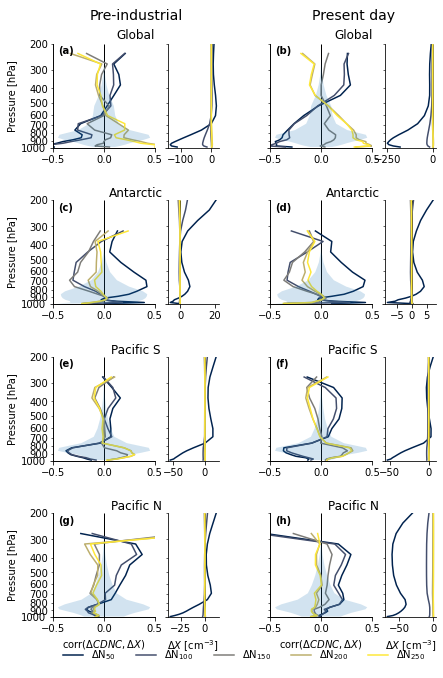

In [9]:
plot_several_areas()

    # %%